In [1]:
# 기본 라이브러리
%matplotlib inline
from preamble import *

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm ### 한글 폰트 깨지는 것 방지        
plt.rc('font', family='NanumGothic')
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False ###
import seaborn as sns
import talib
from pprint import pprint
import warnings #경고문 X
warnings.filterwarnings('ignore') # 경고문 X
sns.set(style="ticks") # seaborn 스타일

In [45]:
F0702 = pd.read_csv('data/20180702/KP200_Future_0.csv', header=None)

In [5]:
F0702.head().transpose()

,0,1,2,3,4
0,KR4101N90006,KR4101N90006,KR4101N90006,KR4101N90006,KR4101N90006
1,101N9,101N9,101N9,101N9,101N9
2,9000000,9000001,9000030,9000030,9000031
3,1,1,1,1,1
4,3e+02,3e+02,3e+02,3e+02,3e+02
5,5,5,5,5,5
6,1,1.1,1,1.1,1
7,-0.33,-0.35,-0.33,-0.35,-0.33
8,1513,1515,1525,1527,1537
9,113096750,113246225,113993725,114143200,114890700


In [6]:
F0702.describe(include = 'all')

,0,1,2,3,...,23,24,25,26
count,36787,36787,3.68e+04,36787.0,...,36787.0,36787.0,36787.0,36787.0
unique,1,1,NaN,NaN,...,NaN,NaN,NaN,NaN
top,KR4101N90006,101N9,NaN,NaN,...,NaN,NaN,NaN,NaN
freq,36787,36787,NaN,NaN,...,NaN,NaN,NaN,NaN
mean,NaN,NaN,1.21e+07,1.0,...,0.0,0.0,0.0,0.0
std,NaN,NaN,2.11e+06,0.0,...,0.0,0.0,0.0,0.0
min,NaN,NaN,9.00e+06,1.0,...,0.0,0.0,0.0,0.0
25%,NaN,NaN,1.01e+07,1.0,...,0.0,0.0,0.0,0.0
50%,NaN,NaN,1.24e+07,1.0,...,0.0,0.0,0.0,0.0
75%,NaN,NaN,1.41e+07,1.0,...,0.0,0.0,0.0,0.0


In [46]:
# 분석할 대상 속성만 남기고 속성 제거
F0702 = F0702.drop(F0702.columns[21:], axis=1)
F0702 = F0702.drop(F0702.columns[[0, 14]], axis=1)

In [47]:
F0702.columns = ['code', 'time', 'id', 'price', 'tic', 'change', 'change_per', 'acc_amount', 'acc_purchase', 'amount', 'yet_amount', 'HP', 'LP', 'MT', 'HT', 'LT', 'sell_H', 'buy_H', 'contract']

In [28]:
F0702.head()

,code,time,id,price,...,sell_H,buy_H,contract,target
0,101N9,9000000,1,299.00,...,0.0,0.00,0,0
1,101N9,9000001,1,298.95,...,299.0,298.95,2,0
2,101N9,9000030,1,299.00,...,299.0,298.95,1,0
3,101N9,9000030,1,298.95,...,299.0,298.95,2,0
4,101N9,9000031,1,299.00,...,299.0,298.95,1,0


In [48]:
df = F0702

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36788 entries, 0 to 0
Data columns (total 20 columns):
code            36788 non-null object
time            36788 non-null int64
id              36788 non-null int64
price           36788 non-null float64
tic             36788 non-null int64
change          36788 non-null float64
change_per      36788 non-null float64
acc_amount      36788 non-null int64
acc_purchase    36788 non-null int64
amount          36788 non-null int64
yet_amount      36788 non-null int64
HP              36788 non-null float64
LP              36788 non-null float64
MT              36788 non-null int64
HT              36788 non-null int64
LT              36788 non-null int64
sell_H          36788 non-null float64
buy_H           36788 non-null float64
contract        36788 non-null int64
target          36788 non-null int64
dtypes: float64(7), int64(12), object(1)
memory usage: 7.1+ MB


In [52]:
# target 변수 생성
for n in range(0, len(df) - 1) :
    if (df['price'][n+1]-df['price'][n]) >= 2 :
        df['target'][n] = 2
    elif (df['price'][n+1]-df['price'][n]) >= 1 and (df['price'][n+1]-df['price'][n]) < 2 :
        df['target'][n] = 1
    elif (df['price'][n+1]-df['price'][n]) > (-1) and (df['price'][n+1]-df['price'][n]) < 1 :
        df['target'][n] = 0
    elif (df['price'][n+1]-df['price'][n]) <= (-1) and (df['price'][n+1]-df['price'][n]) > (-2) :
        df['target'][n] = -1
    elif (df['price'][n+1]-df['price'][n]) <= (-2) :
        df['target'][n] = -2

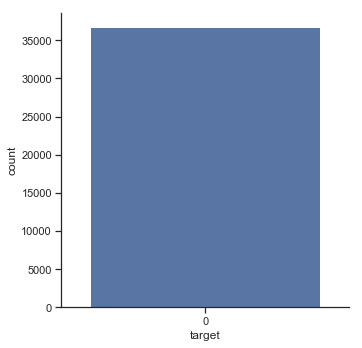

In [56]:
sns.catplot(x="target", kind="count", data=df)

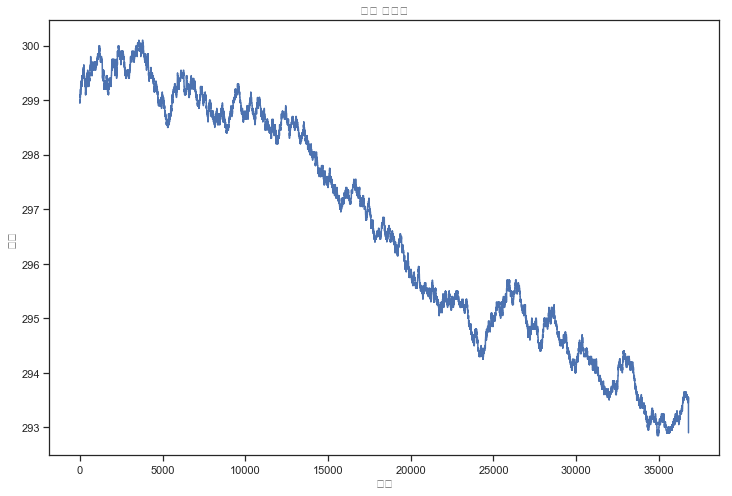

In [58]:
# price 그래프
plt.figure(figsize=(12,8))
df['price'].plot()
plt.title("주가 그래프")
plt.xlabel('거래')
plt.ylabel('주가')
plt.show()

In [57]:
# smooth
import scipy
from scipy import signal

In [80]:
df['smooth_price'] = signal.savgol_filter(df['price'], 777, 3)

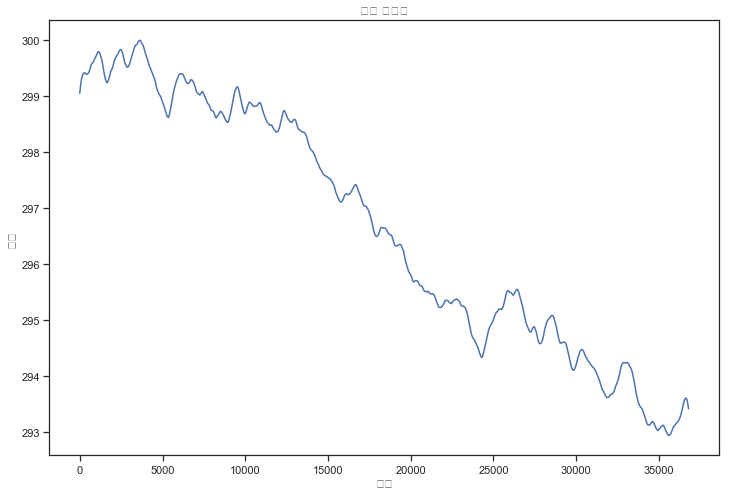

In [81]:
# smooth 그래프
plt.figure(figsize=(12,8))
df['smooth_price'].plot()
plt.title("주가 그래프")
plt.xlabel('거래')
plt.ylabel('주가')
plt.show()

In [85]:
# smooth MA(moving average)
def smoothTriangle(data, degree, dropVals=False):
    triangle=np.array(list(range(degree)) + [degree] + list(range(degree)[::-1])) + 1
    smoothed=[]

    for i in range(degree, len(data) - degree * 2):
        point=data[i:i + len(triangle)] * triangle
        smoothed.append(sum(point)/sum(triangle))
    if dropVals:
        return smoothed
    smoothed=[smoothed[0]]*int(degree + degree/2) + smoothed
    while len(smoothed) < len(data):
        smoothed.append(smoothed[-1])
    return smoothed

In [92]:
# MA
df['MA_price'] = smoothTriangle(df['smooth_price'], 100)

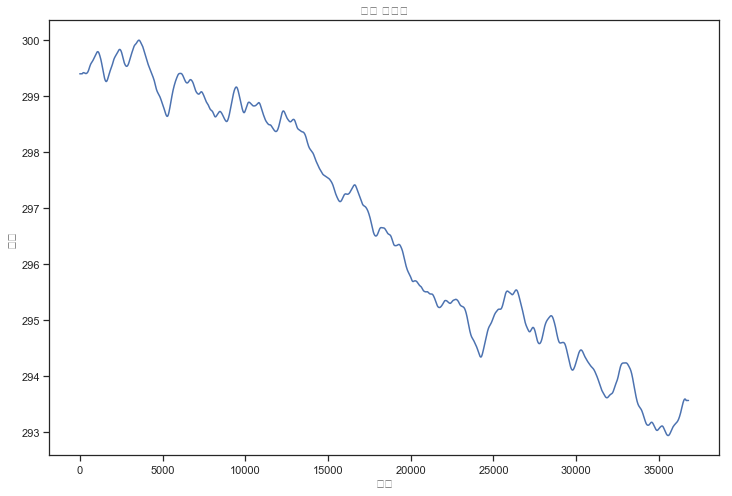

In [93]:
# MA_smooth 그래프
plt.figure(figsize=(12,8))
df['MA_price'].plot()
plt.title("주가 그래프")
plt.xlabel('거래')
plt.ylabel('주가')
plt.show()

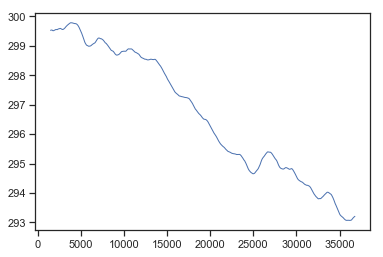

In [113]:
plt.plot(df['price'].rolling(1500).mean(), 'b', lw=1)

In [115]:
import scipy.interpolate as spi

In [121]:
x = df['price'].index

In [143]:
ipo = spi.splrep(x, df['price'].rolling(1500).mean(), k=3)
iy = spi.splev(x, ipo)

In [141]:
iy

array([    nan,     nan,     nan, ..., 293.205, 293.205, 293.205])

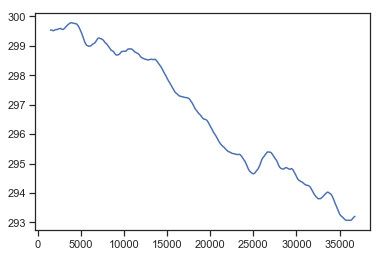

In [145]:
plt.plot(x, f(x))
plt.plot(x, iy, 'ro')

In [125]:
def f(x):
    return df['price'].rolling(1500).mean()

In [ ]:
# 필터링 명령어(Savitzky-Golay Filter)
trace3 = go.Scatter(
    x=x,
    y=signal.savgol_filter(y, 53, 3),
    mode='markers',
    marker=dict(
        size=6,
        color='#C190F0',
        symbol='triangle-up'
    ),
    name='Savitzky-Golay'
)

layout = go.Layout(
    showlegend=True
)

data = [trace1, trace2, trace3]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='smoothing-savitzky-golay-filter')

In [ ]:
# 필터링 명령어(Triangular Moving Average)
trace3 = go.Scatter(
    x=x,
    y=smoothTriangle(y_noise, 10),  # setting degree to 10
    mode='markers',
    marker=dict(
        size=6,
        color='#C190F0',
        symbol='triangle-up'
    ),
    name='Moving Triangle - Degree 10'
)

layout = go.Layout(
    showlegend=True
)

data = [trace1, trace2, trace3]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='smoothing-triangular-moving-average-degree-10')

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [47]:
X = df.drop(['code', 'price', 'change', 'change_per'], axis = 1)
y = df.price

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [49]:
lr = LinearRegression().fit(X_train, y_train)

In [50]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [-0.    -0.    -0.264 -0.001  0.     0.002 -0.    -0.     0.906  0.
 -0.    -0.    -0.424  0.459 -0.047]
lr.intercept_: 205.43640588047106


In [51]:
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수: 0.98
테스트 세트 점수: 0.98


In [52]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge.score(X_test, y_test)))

훈련 세트 점수: 0.98
테스트 세트 점수: 0.98


In [53]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 특성의 개수: {}".format(np.sum(lasso.coef_ != 0)))
print("반복학습 수: {}".format(lasso.n_iter_))

훈련 세트 점수: 0.98
테스트 세트 점수: 0.98
사용한 특성의 개수: 6
반복학습 수: 1000


In [ ]:
df['15min'] = df.amount / 
df['30min'] = 
df.head()

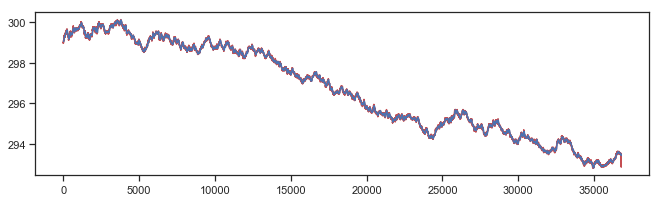

In [35]:
sma = talib.SMA(F0702['price'])
plt.figure(figsize=(11,3))
plt.plot(F0702.price, "r-")
plt.plot(sma, "b-")
plt.show()

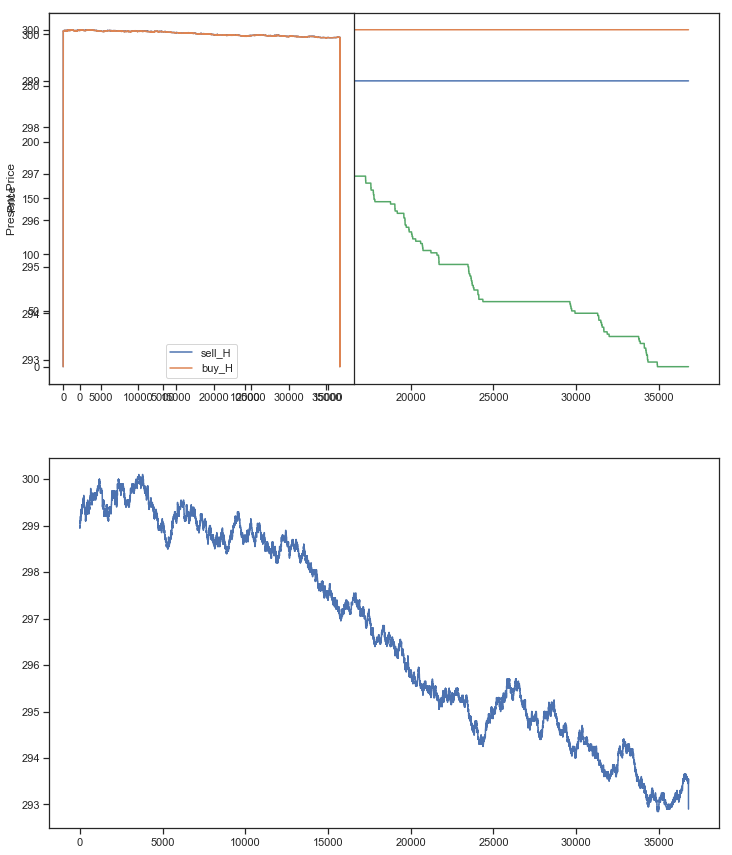

In [47]:
fig = plt.figure(figsize=(12,15))

ax1 = fig.add_subplot(211)
ax1.set_ylabel('Price')

ax2 = fig.add_subplot(221)
ax2.set_ylabel('H_price')

ax3 = fig.add_subplot(212)
F0702.price.plot(ax=ax3)
ax2.set_ylabel('Present Price')

F0702[['MP', 'HP', 'LP']].plot(ax=ax1)
F0702[['sell_H', 'buy_H']].plot(ax=ax2)

plt.show()

In [38]:
type(F0702.price)

pandas.core.series.Series